# Lab 5)

In [33]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from scipy import stats
import h5py
import pandas as pd
import imageio
import pickle as pkl

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,6)


14 variables used I will try to describe each of them here as to give a better understanding of what the Metadata is telling us. 

pt or $p_{\tau}$: the measured transverse momentum, associated with the mass measured. 

eta or $\eta$: "pseudorapidity", a coordinate value that is a function of $\theta$ which is equal to zero when perpendicular to the beam and equal to $\infty$ or $-\infty$ along the transverse axis. $\eta ≡ \text{ln}(\text{cot}(\frac{θ}{2}))  \approx \frac{\pi}{2} - \theta$ approximation as $\theta \rightarrow \frac{\pi}{2}$ 

phi or $\phi$: coordinate value that determines the radial location of a detection that spans $(-\pi, \pi)$ 

mass or $M_T$: the transverse mass of the detection. Higgs has a peak around 125.09 GeV

angularity: an observed quantity that is sensitive to the symmetry of energy flow in the jet (shorter tail can be a sign of two-body kinematics)

$\tau_n$: Sub-jettiness, has to do with the spread of a jet if divided into n sub-jets

$\tau_{mn}$: Sub-jettiness ratio $\frac{\tau_m}{\tau_n}$ or $\frac{\tau_m}{\tau_{m-1}}$ 

$k_T \Delta R$: size parameter of the cone associated with the jet projection

In [34]:
qcd_before = pkl.load( open( "gcd.pkl", "rb" ) )
higgs_before = pkl.load( open( "higgs.pkl", "rb"))
qcd = pd.DataFrame(qcd_before, columns=['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])
higgs = pd.DataFrame(higgs_before, columns=['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])

In [35]:
qcd_new = qcd.query(f'-2 < eta < 1.9 and d2 < 50 and ee2 < .08 and ee3 < .001 and mass < 160 and KtDeltaR < .9')

In [36]:
higgs_new = higgs.query(f'-2 < eta < 1.9 and d2 < 50 and ee2 < .08 and ee3 < .001 and mass < 160 and KtDeltaR < .9')

Text(0.5, 1.0, 'Angularity')

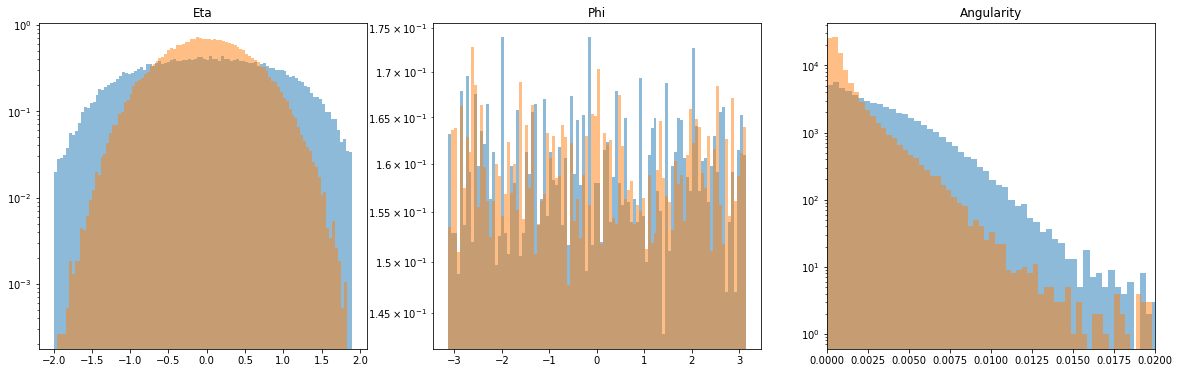

In [37]:
bins = 100; a = .5
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6)) 
ax1.hist(qcd_new['eta'], bins, alpha = a, density = True); ax1.hist(higgs_new['eta'], bins, alpha = a, density = True); ax1.set_yscale('log')
ax2.hist(qcd_new['phi'], bins, alpha = a, density = True); ax2.hist(higgs_new['phi'], bins, alpha = a, density = True);ax2.set_yscale('log')
ax3.hist(qcd_new['angularity'], bins, alpha = a); ax3.hist(higgs_new['angularity'], bins, alpha = a); ax3.set_xlim(0, 0.02); ax3.set_yscale('log')
ax1.set_title('Eta'); ax2.set_title('Phi'); ax3.set_title('Angularity')

The above plot shows me that there is discriminatory features in Eta and Angularity, but not in Phi. This will allow for cuts to be made in Eta and Angularity. Eta appears to be Gaussian and Angularity looks to be Poisson or Exponential (further research). Plots below do not display any new information, just a different way to plot. 

Text(0.5, 1.0, 'Angularity')

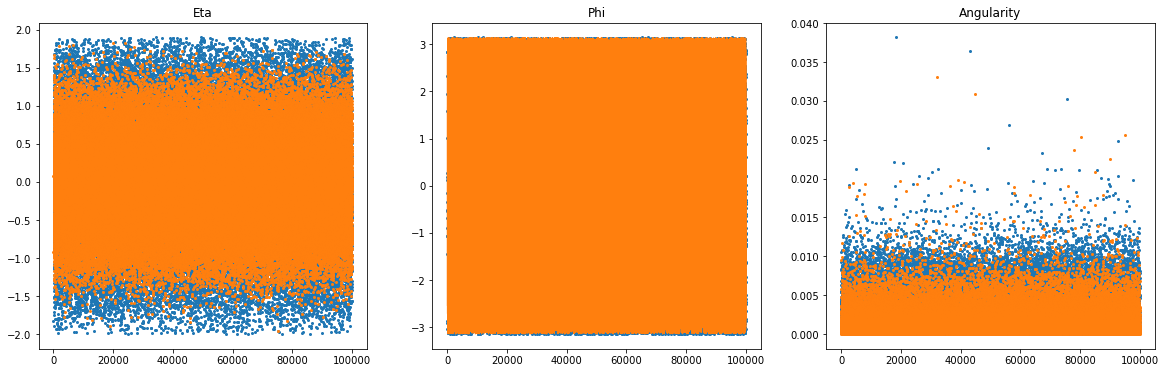

In [38]:
bins = 100; a = .5
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))
ax1.plot(qcd_new['eta'], 'o', lw = 1, ms = 2); ax1.plot(higgs_new['eta'], 'o', lw = 1, ms = 2); 
ax2.plot(qcd_new['phi'], 'o', lw = 1, ms = 2); ax2.plot(higgs_new['phi'], lw = 1, ms = 2);
ax3.plot(qcd_new['angularity'], 'o', lw = 0, ms = 2); ax3.plot(higgs_new['angularity'], 'o', lw = 0, ms = 2);
ax1.set_title('Eta'); ax2.set_title('Phi'); ax3.set_title('Angularity')
#ax1.set_xlim(4000,5000); ax2.set_xlim(4000,5000); ax3.set_xlim(4000,5000);

(0, 0.01)

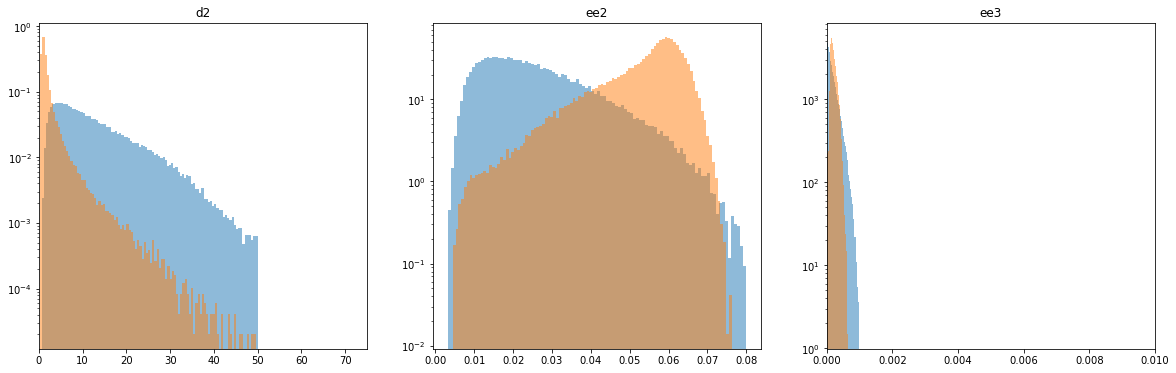

In [39]:
bins = 100; a = .5
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))
ax1.hist(qcd_new['d2'], bins, alpha = a, density = True); ax1.hist(higgs_new['d2'], bins, alpha = a, density = True); ax1.set_yscale('log')
ax2.hist(qcd_new['ee2'], bins, alpha = a, density = True); ax2.hist(higgs_new['ee2'], bins, alpha = a, density = True);ax2.set_yscale('log')
ax3.hist(qcd_new['ee3'], bins, alpha = a, density = True); ax3.hist(higgs_new['ee3'], bins, alpha = a, density = True);ax3.set_yscale('log')
ax1.set_title('d2'); ax2.set_title('ee2'); ax3.set_title('ee3'); ax1.set_xlim(0,75); ax3.set_xlim(0,.01)

These plots describe a noticable difference between the background and the signal. Here 'd2' shows a peak at a much different value for the signal, also that peak is much tighter and therefore more concentrated. 'ee2' has completely different distributions for the two plots. The distribution for the signal appears to be an "extreme value Type I" distribution and the background appears Poissonian or a gamma distribution (more research). 'ee3' has a similar situation to 'd2' in which there is a definite peak of greate concentration that will alow for easy cuts.  

Text(0.5, 1.0, 'ee3')

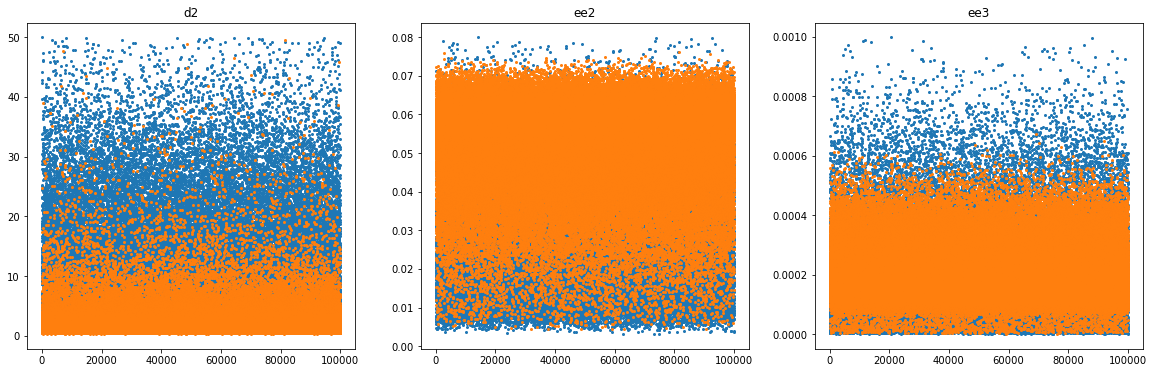

In [40]:
bins = 100; a = .5
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))
ax1.plot(qcd_new['d2'], 'o', lw = 0, ms = 2); ax1.plot(higgs_new['d2'], 'o', lw = 0, ms = 2); 
ax2.plot(qcd_new['ee2'], 'o', lw = 0, ms = 2); ax2.plot(higgs_new['ee2'], 'o', lw = 0, ms = 2);
ax3.plot(qcd_new['ee3'], 'o', lw = 0, ms = 2); ax3.plot(higgs_new['ee3'], 'o', lw = 0, ms = 2);
ax1.set_title('d2'); ax2.set_title('ee2'); ax3.set_title('ee3')
#ax1.set_xlim(4000,5000); ax2.set_xlim(4000,5000); ax3.set_xlim(4000,5000);

Text(0.5, 1.0, 'Tau_3')

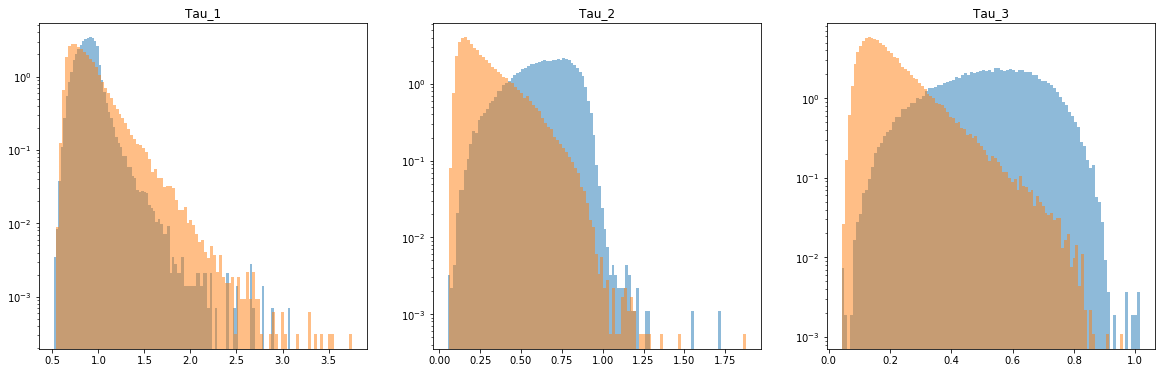

In [41]:
bins = 100; a = .5
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))
ax1.hist(qcd_new['t1'], bins, alpha = a, density = True); ax1.hist(higgs_new['t1'], bins, alpha = a, density = True); ax1.set_yscale('log')
ax2.hist(qcd_new['t2'], bins, alpha = a, density = True); ax2.hist(higgs_new['t2'], bins, alpha = a, density = True); ax2.set_yscale('log')
ax3.hist(qcd_new['t3'], bins, alpha = a, density = True); ax3.hist(higgs_new['t3'], bins, alpha = a, density = True); ax3.set_yscale('log')
ax1.set_title('Tau_1'); ax2.set_title('Tau_2'); ax3.set_title('Tau_3')

Tau_1 appears to have the same distribution for the background and signal, Tau_2 has different distributions, and Tau_3 has very different distributions. The signal distributions seem to be of the same shape, which looks like a chi or chi^2 distribution. Not sure what the background distributions are. Possible ways to filter out data would be to change the sensitivity for certain values of sub-jettiness.

Text(0.5, 1.0, 'Tau_3')

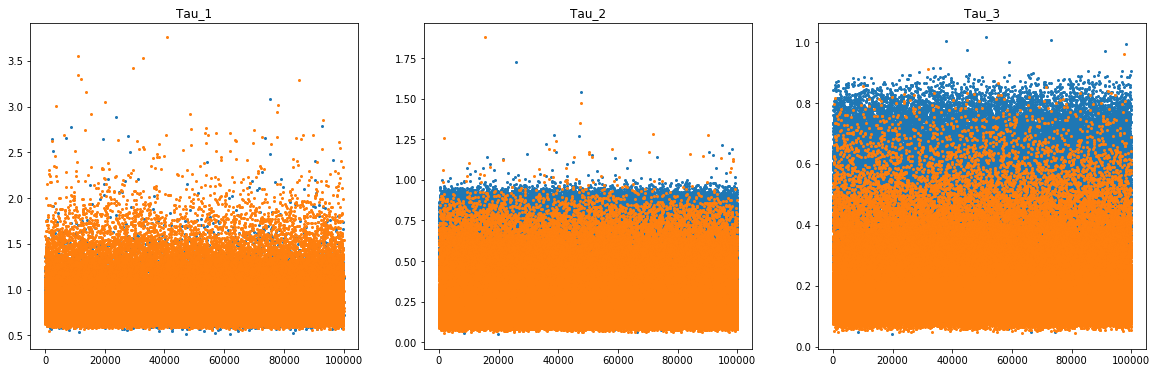

In [42]:
bins = 100; a = .5
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))
ax1.plot(qcd_new['t1'], 'o', lw = 0, ms = 2); ax1.plot(higgs_new['t1'], 'o', lw = 0, ms = 2); 
ax2.plot(qcd_new['t2'], 'o', lw = 0, ms = 2); ax2.plot(higgs_new['t2'], 'o', lw = 0, ms = 2);
ax3.plot(qcd_new['t3'], 'o', lw = 0, ms = 2); ax3.plot(higgs_new['t3'], 'o', lw = 0, ms = 2);
ax1.set_title('Tau_1'); ax2.set_title('Tau_2'); ax3.set_title('Tau_3')
#ax1.set_xlim(4000,5000); ax2.set_xlim(4000,5000); ax3.set_xlim(4000,5000);

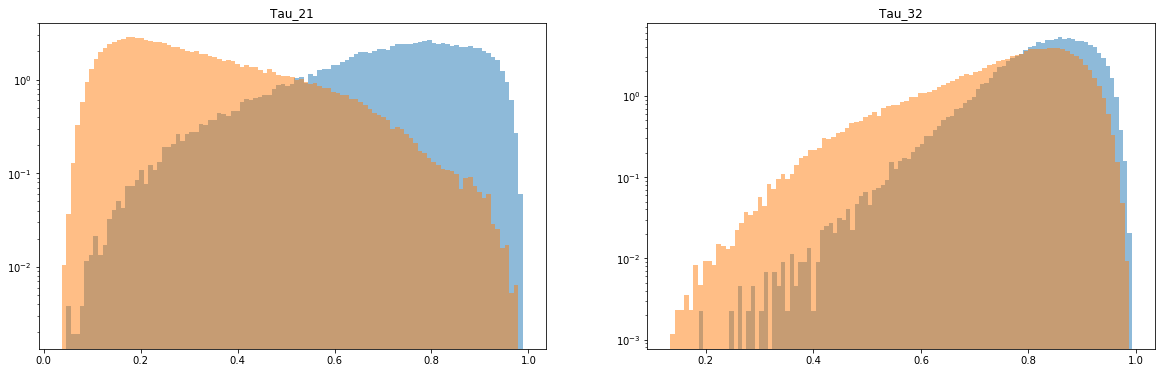

In [43]:
bins = 100; a = .5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
ax1.hist(qcd_new['t21'], bins, alpha = a, density = True); ax1.hist(higgs_new['t21'], bins, alpha = a, density = True); ax1.set_yscale('log')
ax2.hist(qcd_new['t32'], bins, alpha = a, density = True); ax2.hist(higgs_new['t32'], bins, alpha = a, density = True); ax2.set_yscale('log')
ax1.set_title('Tau_21'); ax2.set_title('Tau_32');

Tau_32 looks extremely similar in both the background and signal datasets, probably not great for filtering. But, Tau_21 has extreme differences in the peak value. This could be used to change sensitivity of the sets. The distributions look similar to "Extreme Value Type I" distributions. 

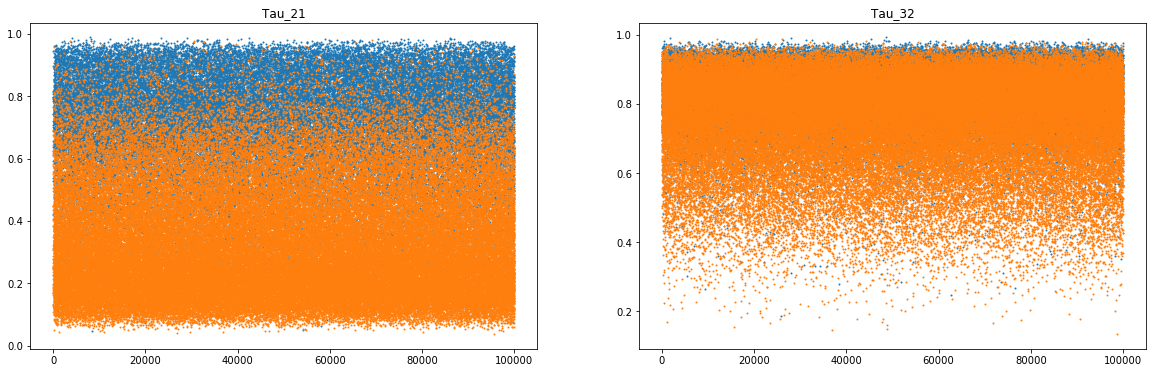

In [44]:
Tau_fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
ax1.plot(qcd_new['t21'], 'o', lw = 1, ms = 1); ax1.plot(higgs_new['t21'], 'o', lw = 1, ms = 1); 
ax2.plot(qcd_new['t32'], 'o', lw = 1, ms = 1); ax2.plot(higgs_new['t32'], 'o', lw = 1, ms = 1);
ax1.set_title('Tau_21'); ax2.set_title('Tau_32');
#ax1.set_xlim(4000,5000); ax2.set_xlim(4000,5000); ax3.set_xlim(4000,5000);

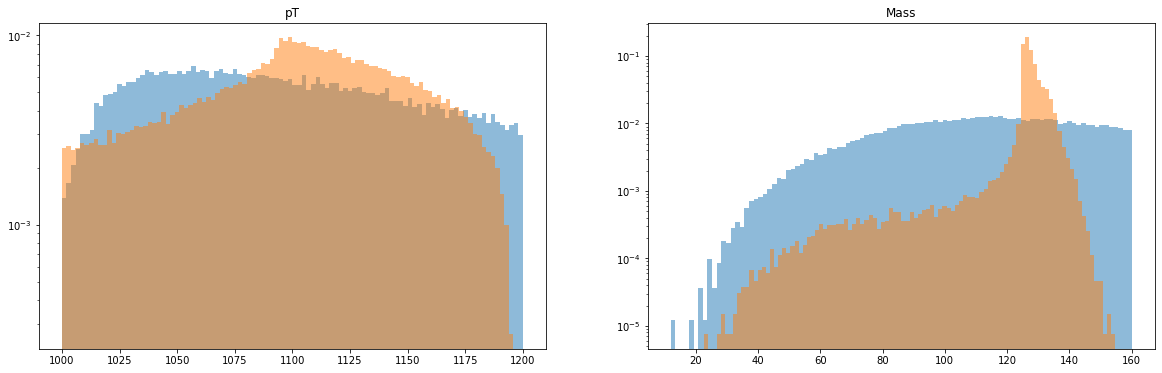

In [47]:
bins = 100; a = .5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
ax1.hist(qcd_new['pt'], bins, alpha = a, density = True); ax1.hist(higgs_new['pt'], bins, alpha = a, density = True); ax1.set_yscale('log')
ax2.hist(qcd_new['mass'], bins, alpha = a, density = True); ax2.hist(higgs_new['mass'], bins, alpha = a, density = True); ax2.set_yscale('log')
ax1.set_title('pT'); ax2.set_title('Mass'); #ax2.set_xlim(90,160)

#### The Mass of the signal should follow a distribution composed of both a Landau and a Gaussian. 
These are the two most interesting plots to me. The momentum measurement distribution looks like a combination of distributions  overlayed. the curvature of the pT distribution is like something I've never seen before. Also after some reading, I found that the mass of the signal should appear as the Landau and Gaussian combined. Mass cuts are going to be the most crucial part of finding the higgs. 

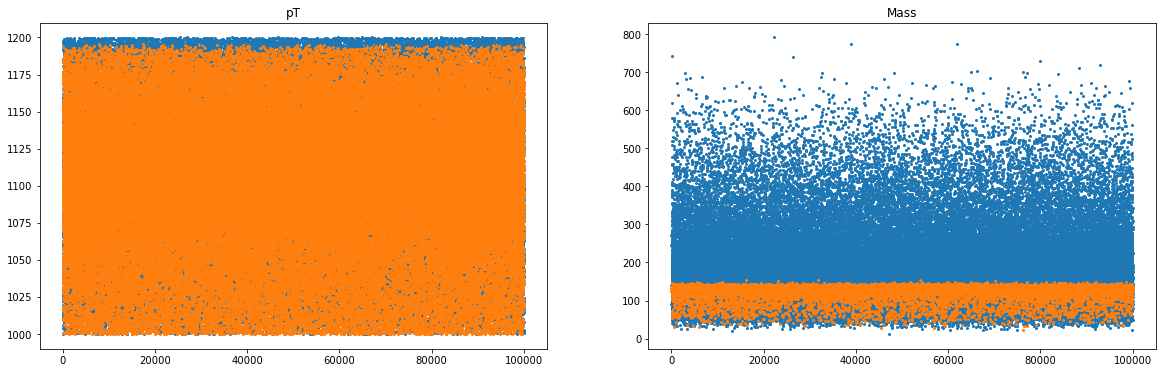

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
ax1.plot(qcd_new['pt'], 'o', lw = 0, ms = 2); ax1.plot(higgs_new['pt'], 'o', lw = 0, ms = 2); 
ax2.plot(qcd_new['mass'], 'o', lw = 0, ms = 2); ax2.plot(higgs_new['mass'], 'o', lw = 0, ms = 2);
ax1.set_title('pT'); ax2.set_title('Mass');
#ax1.set_xlim(4000,5000); ax2.set_xlim(4000,5000); ax3.set_xlim(4000,5000);

Text(0.5, 1.0, 'KtDeltaR')

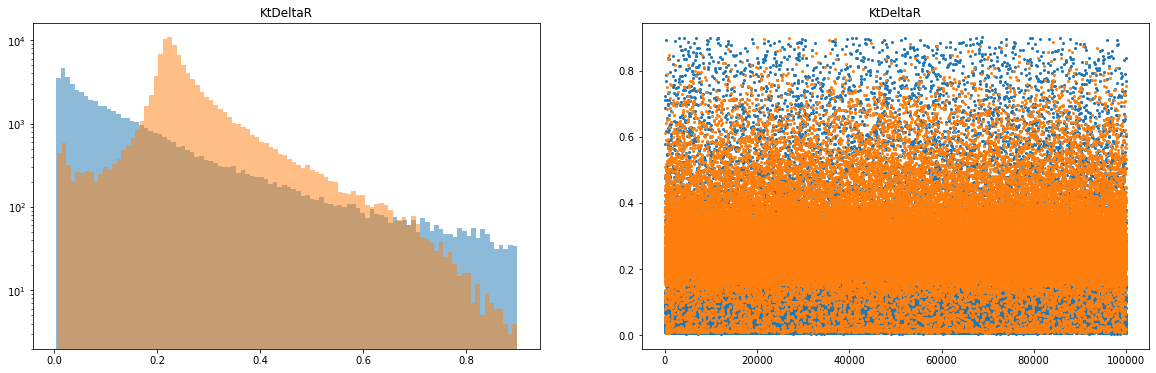

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
ax1.hist(qcd_new['KtDeltaR'], bins, alpha = a); ax1.hist(higgs_new['KtDeltaR'], bins, alpha = a); ax1.set_yscale('log')
ax2.plot(qcd_new['KtDeltaR'], 'o', lw = 0, ms = 2); ax2.plot(higgs_new['KtDeltaR'], 'o', lw = 0, ms = 2); 
ax1.set_title('KtDeltaR'); ax2.set_title('KtDeltaR')
#ax2.set_xlim(4000,5000); 

This peak is very curious. I can see that some cuts from this data can be taken ouit but I don't think much of a change will come from that. This also looks like it could be from multiple different distributions. 

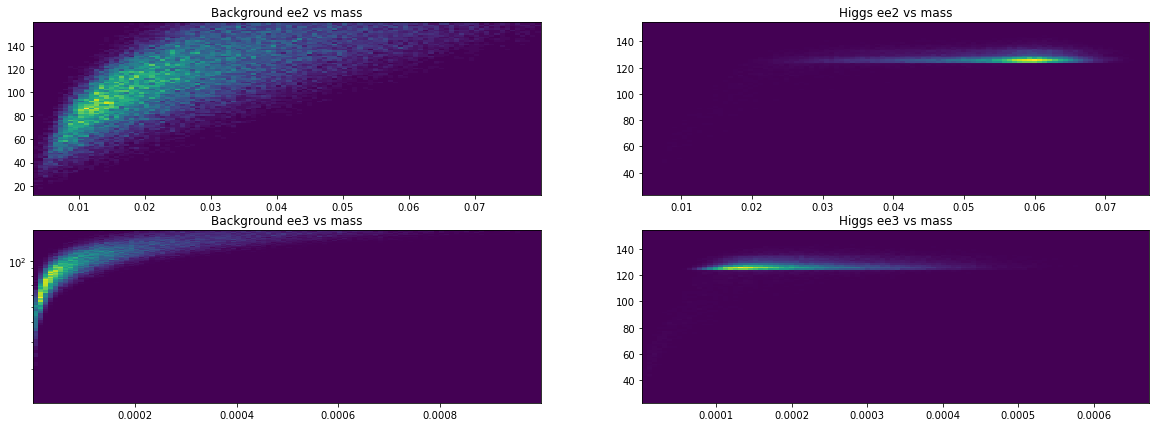

In [50]:
bins = 100
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize = (20, 7))
h=ax1.hist2d(qcd_new['ee2'], qcd_new['mass'], bins); #ax1.set_yscale('log')
h=ax2.hist2d(higgs_new['ee2'], higgs_new['mass'], bins); #ax2.set_ylim(120, 135)
h=ax3.hist2d(qcd_new['ee3'], qcd_new['mass'], bins); ax3.set_yscale('log')
h=ax4.hist2d(higgs_new['ee3'], higgs_new['mass'], bins); #ax4.set_ylim(120, 135)
ax1.set_title('Background ee2 vs mass'); ax2.set_title('Higgs ee2 vs mass'); 
ax3.set_title('Background ee3 vs mass'); ax4.set_title('Higgs ee3 vs mass'); 

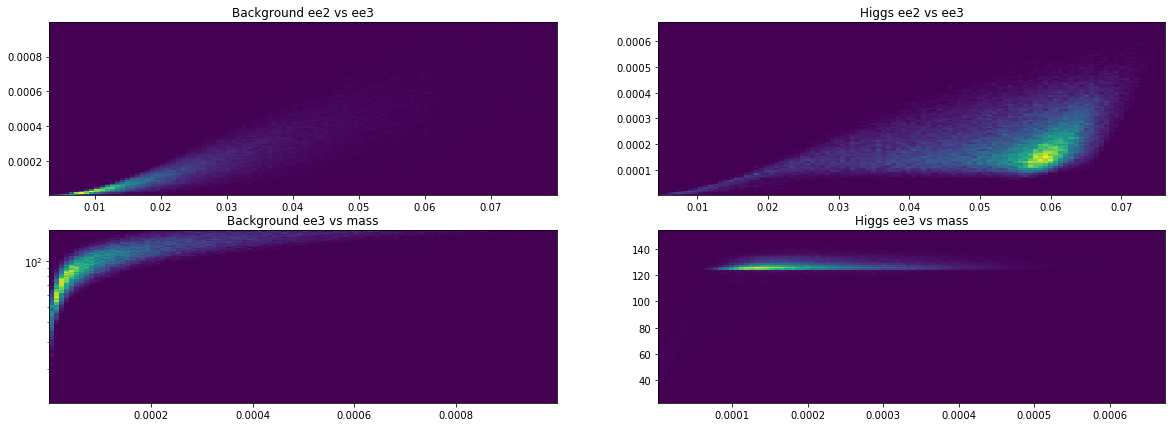

In [59]:
bins = 100
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize = (20, 7))
h=ax1.hist2d(qcd_new['ee2'], qcd_new['ee3'], bins); #ax1.set_yscale('log')
h=ax2.hist2d(higgs_new['ee2'], higgs_new['ee3'], bins); #ax2.set_ylim(120, 135)
h=ax3.hist2d(qcd_new['ee3'], qcd_new['mass'], bins); ax3.set_yscale('log')
h=ax4.hist2d(higgs_new['ee3'], higgs_new['mass'], bins); #ax4.set_ylim(120, 135)
ax1.set_title('Background ee2 vs ee3'); ax2.set_title('Higgs ee2 vs ee3'); 
ax3.set_title('Background ee3 vs mass'); ax4.set_title('Higgs ee3 vs mass'); 

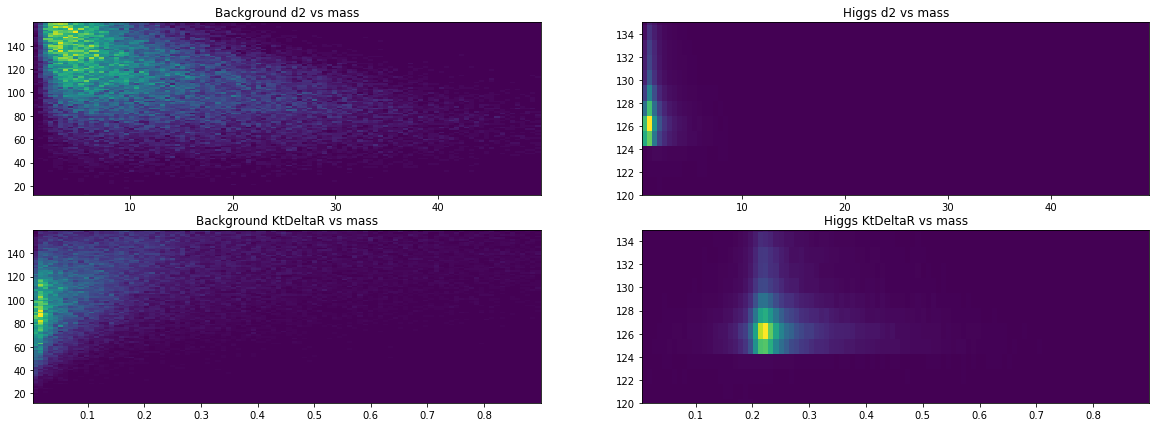

In [51]:
bins = 100
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize = (20, 7))
h=ax1.hist2d(qcd_new['d2'], qcd_new['mass'], bins); #ax1.set_yscale('log')
h=ax2.hist2d(higgs_new['d2'], higgs_new['mass'], bins); ax2.set_ylim(120, 135)
h=ax3.hist2d(qcd_new['KtDeltaR'], qcd_new['mass'], bins); #ax3.set_yscale('log')
h=ax4.hist2d(higgs_new['KtDeltaR'], higgs_new['mass'], bins); ax4.set_ylim(120, 135)
ax1.set_title('Background d2 vs mass'); ax2.set_title('Higgs d2 vs mass'); 
ax3.set_title('Background KtDeltaR vs mass'); ax4.set_title('Higgs KtDeltaR vs mass'); 

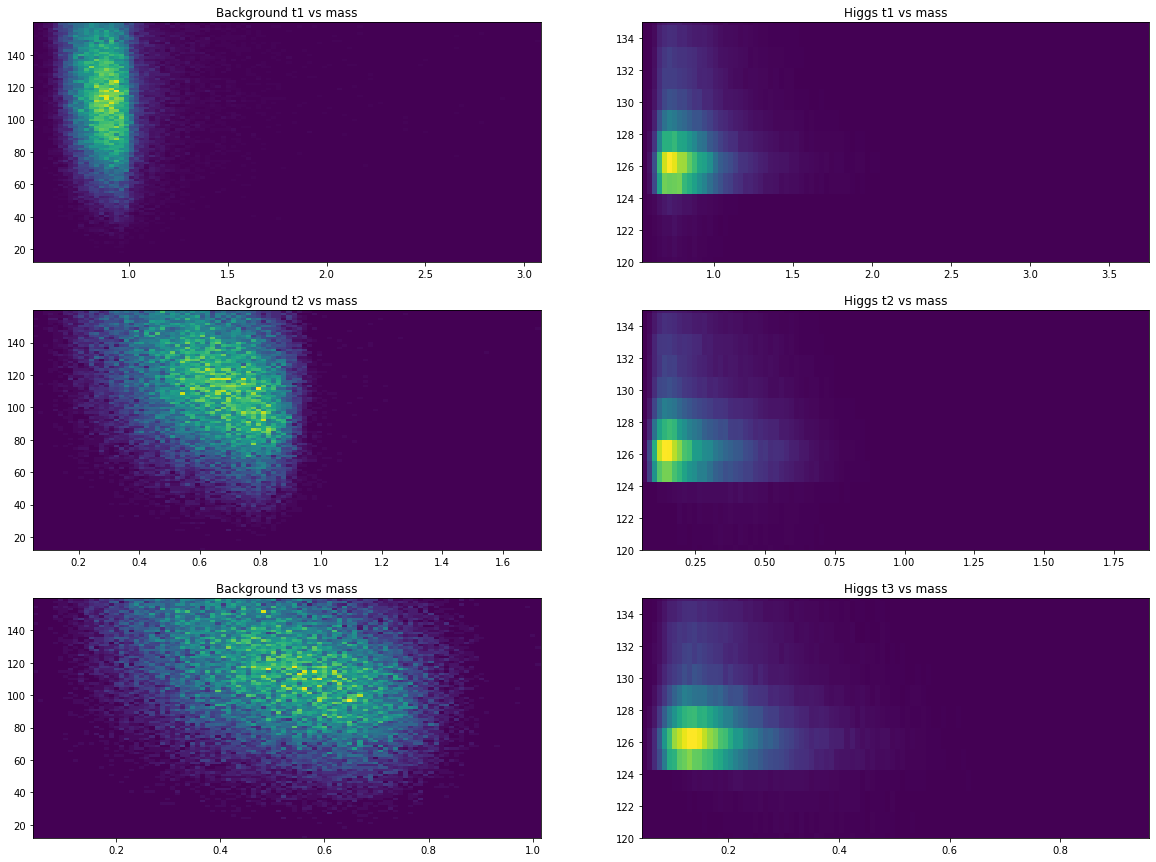

In [61]:
bins = 100
fig, ([ax1, ax2],[ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize = (20, 15))
h=ax1.hist2d(qcd_new['t1'], qcd_new['mass'], bins); #ax1.set_yscale('log')
h=ax2.hist2d(higgs_new['t1'], higgs_new['mass'], bins); ax2.set_ylim(120, 135)
h=ax3.hist2d(qcd_new['t2'], qcd_new['mass'], bins);# ax3.set_yscale('log')
h=ax4.hist2d(higgs_new['t2'], higgs_new['mass'], bins); ax4.set_ylim(120, 135)
h=ax5.hist2d(qcd_new['t3'], qcd_new['mass'], bins);# ax5.set_yscale('log')
h=ax6.hist2d(higgs_new['t3'], higgs_new['mass'], bins); ax6.set_ylim(120, 135)
ax1.set_title('Background t1 vs mass'); ax2.set_title('Higgs t1 vs mass'); 
ax3.set_title('Background t2 vs mass'); ax4.set_title('Higgs t2 vs mass'); 
ax5.set_title('Background t3 vs mass'); ax6.set_title('Higgs t3 vs mass'); 

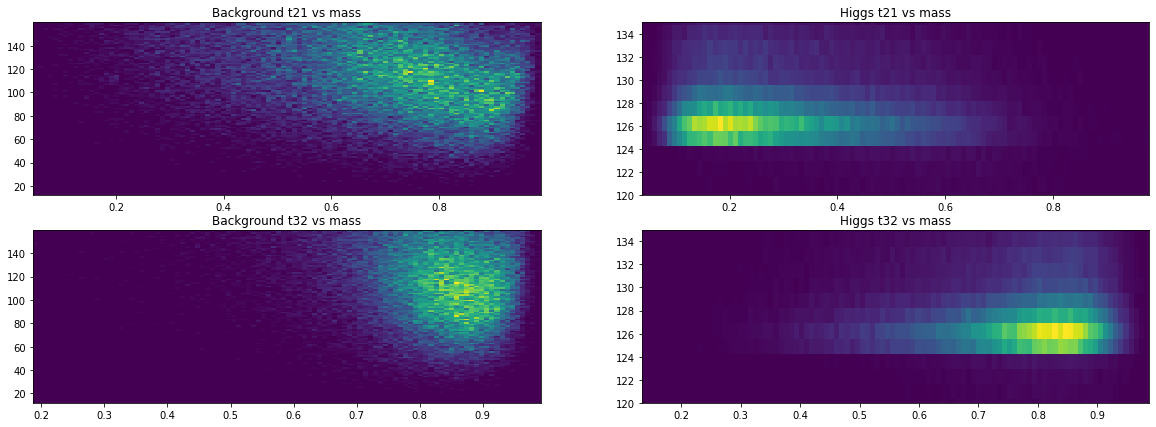

In [53]:
bins = 100
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize = (20, 7))
h=ax1.hist2d(qcd_new['t21'], qcd_new['mass'], bins); #ax1.set_yscale('log')
h=ax2.hist2d(higgs_new['t21'], higgs_new['mass'], bins); ax2.set_ylim(120, 135)
h=ax3.hist2d(qcd_new['t32'], qcd_new['mass'], bins); #ax3.set_yscale('log')
h=ax4.hist2d(higgs_new['t32'], higgs_new['mass'], bins); ax4.set_ylim(120, 135)
ax1.set_title('Background t21 vs mass'); ax2.set_title('Higgs t21 vs mass'); 
ax3.set_title('Background t32 vs mass'); ax4.set_title('Higgs t32 vs mass'); 

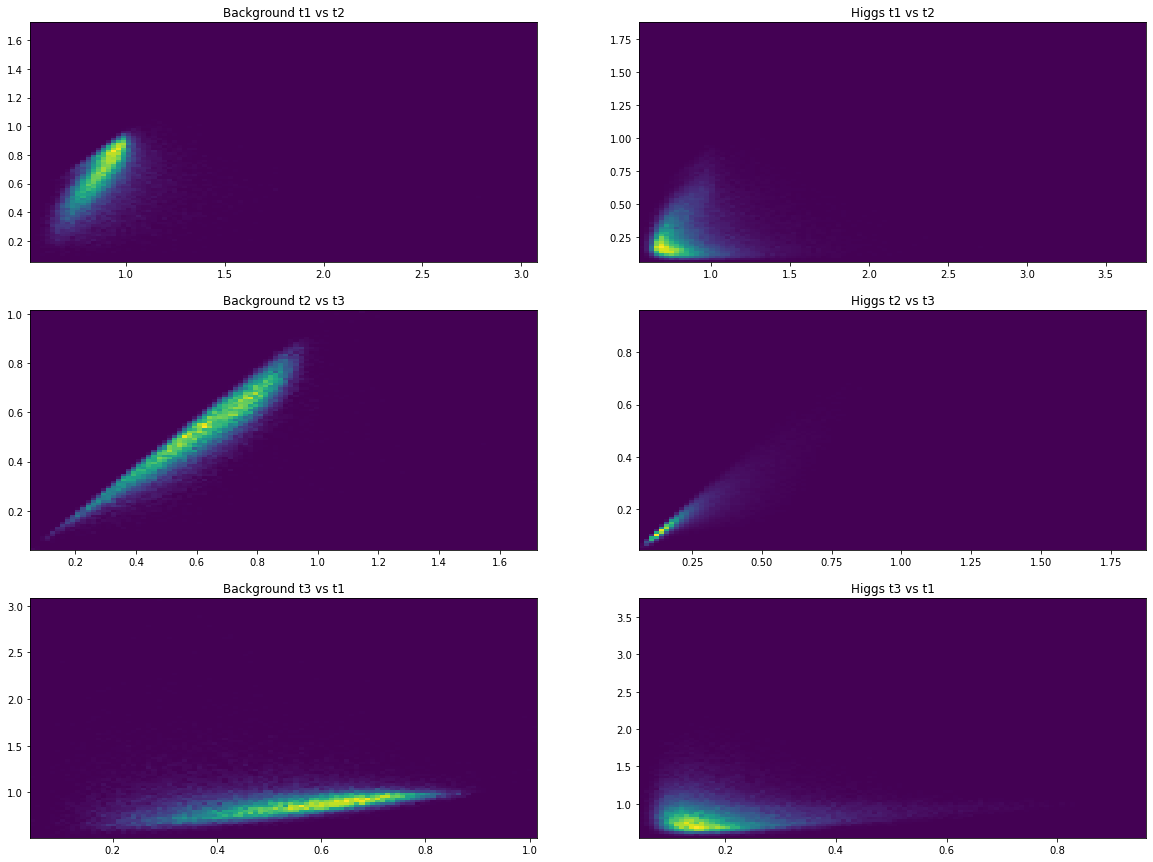

In [54]:
bins = 100
fig, ([ax1, ax2],[ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize = (20, 15))
h=ax1.hist2d(qcd_new['t1'], qcd_new['t2'], bins); #ax1.set_yscale('log')
h=ax2.hist2d(higgs_new['t1'], higgs_new['t2'], bins)
h=ax3.hist2d(qcd_new['t2'], qcd_new['t3'], bins);# ax3.set_yscale('log')
h=ax4.hist2d(higgs_new['t2'], higgs_new['t3'], bins); 
h=ax5.hist2d(qcd_new['t3'], qcd_new['t1'], bins);# ax5.set_yscale('log')
h=ax6.hist2d(higgs_new['t3'], higgs_new['t1'], bins); 
ax1.set_title('Background t1 vs t2'); ax2.set_title('Higgs t1 vs t2'); 
ax3.set_title('Background t2 vs t3'); ax4.set_title('Higgs t2 vs t3'); 
ax5.set_title('Background t3 vs t1'); ax6.set_title('Higgs t3 vs t1'); 

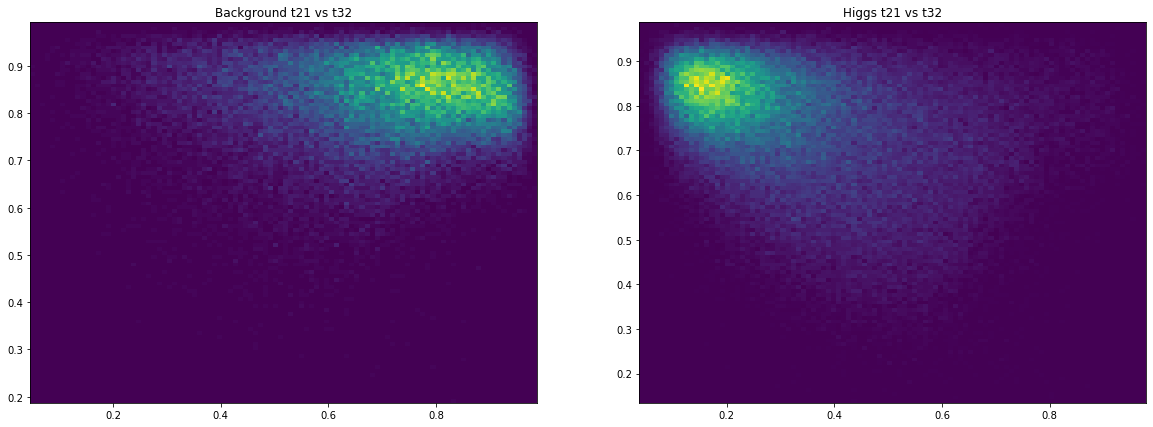

In [55]:
bins = 100
fig, ([ax1, ax2]) = plt.subplots(1, 2, figsize = (20, 7))
h=ax1.hist2d(qcd_new['t21'], qcd_new['t32'], bins); #ax1.set_yscale('log')
h=ax2.hist2d(higgs_new['t21'], higgs_new['t32'], bins)
ax1.set_title('Background t21 vs t32'); ax2.set_title('Higgs t21 vs t32'); 

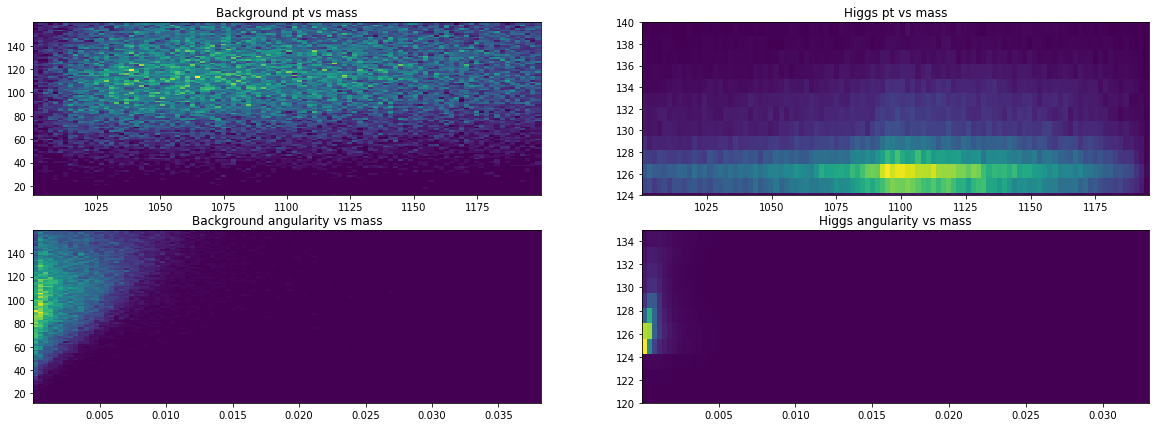

In [56]:
bins = 100
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize = (20, 7))
h=ax1.hist2d(qcd_new['pt'], qcd_new['mass'], bins); #ax1.set_yscale('log')
h=ax2.hist2d(higgs_new['pt'], higgs_new['mass'], bins); ax2.set_ylim(124, 140)
h=ax3.hist2d(qcd_new['angularity'], qcd_new['mass'], bins); #ax3.set_yscale('log')
h=ax4.hist2d(higgs_new['angularity'], higgs_new['mass'], bins); ax4.set_ylim(120, 135)
ax1.set_title('Background pt vs mass'); ax2.set_title('Higgs pt vs mass'); 
ax3.set_title('Background angularity vs mass'); ax4.set_title('Higgs angularity vs mass'); 

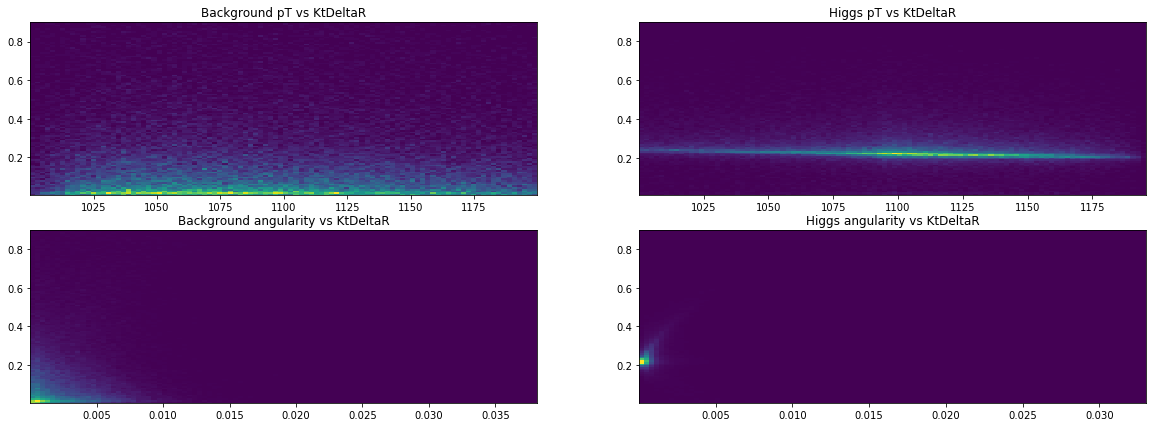

In [57]:
bins = 100
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize = (20, 7))
h=ax1.hist2d(qcd_new['pt'], qcd_new['KtDeltaR'], bins); #ax1.set_yscale('log')
h=ax2.hist2d(higgs_new['pt'], higgs_new['KtDeltaR'], bins); #ax2.set_ylim(124, 140)
h=ax3.hist2d(qcd_new['angularity'], qcd_new['KtDeltaR'], bins); #ax3.set_yscale('log')
h=ax4.hist2d(higgs_new['angularity'], higgs_new['KtDeltaR'], bins); #ax4.set_ylim(120, 135)
ax1.set_title('Background pT vs KtDeltaR'); ax2.set_title('Higgs pT vs KtDeltaR'); 
ax3.set_title('Background angularity vs KtDeltaR'); ax4.set_title('Higgs angularity vs KtDeltaR'); 